In [2]:
import numpy as np
data=np.random.randint(30, size=(6,5))

In [3]:
data #numpy의 기본형 array이다.

array([[ 9, 10,  7,  9, 15],
       [27, 16,  9,  7,  6],
       [17,  7,  2, 17,  7],
       [ 7,  6, 29, 17, 27],
       [23,  9, 25, 29, 10],
       [ 8, 10,  7, 25, 29]])

In [18]:
from numpy import*
mean(data)
mean(data, axis=0) #컬럼 단위
mean(data, axis=1) #행 단위

# 표준화 datas
datas=(data-mean(data, axis=0))/std(data, axis=0) #std=표준편차

In [21]:
mean(datas)
datas
mean(datas, axis=0)
std(datas) #1
std(datas, axis=0)
#np.mean(array), np.std(array), np.var(array)

array([1., 1., 1., 1., 1.])

In [47]:
datas.mean() #16만큼 0... 0의 수렴하는 값을 뜻함.

1.1842378929335003e-16

In [22]:
import scipy.stats as ss

In [24]:
datas

array([[-0.79519341,  0.10425721, -0.61217683, -1.059284  , -0.07249994],
       [ 1.52591168,  1.98088693, -0.41363299, -1.31351216, -1.05124918],
       [ 0.23640885, -0.83405766, -1.10853642, -0.04237136, -0.94249926],
       [-1.05309398, -1.14682928,  1.57180537, -0.04237136,  1.23249904],
       [ 1.01011055, -0.20851441,  1.1747177 ,  1.4829976 , -0.61624952],
       [-0.9241437 ,  0.10425721, -0.61217683,  0.97454128,  1.44999887]])

In [23]:
ss.zscore(data) #표준화를 한줄에 끝내는 함수 

array([[-0.79519341,  0.10425721, -0.61217683, -1.059284  , -0.07249994],
       [ 1.52591168,  1.98088693, -0.41363299, -1.31351216, -1.05124918],
       [ 0.23640885, -0.83405766, -1.10853642, -0.04237136, -0.94249926],
       [-1.05309398, -1.14682928,  1.57180537, -0.04237136,  1.23249904],
       [ 1.01011055, -0.20851441,  1.1747177 ,  1.4829976 , -0.61624952],
       [-0.9241437 ,  0.10425721, -0.61217683,  0.97454128,  1.44999887]])

In [26]:
from sklearn.preprocessing import StandardScaler 
StandardScaler().fit_transform(data) #표준화 함수

array([[-0.79519341,  0.10425721, -0.61217683, -1.059284  , -0.07249994],
       [ 1.52591168,  1.98088693, -0.41363299, -1.31351216, -1.05124918],
       [ 0.23640885, -0.83405766, -1.10853642, -0.04237136, -0.94249926],
       [-1.05309398, -1.14682928,  1.57180537, -0.04237136,  1.23249904],
       [ 1.01011055, -0.20851441,  1.1747177 ,  1.4829976 , -0.61624952],
       [-0.9241437 ,  0.10425721, -0.61217683,  0.97454128,  1.44999887]])

#집 값 예측을 위한 회귀 모델
#아파트 집 값 = w1*평수 + w2*층 - w3*역거리 + bias
#아파트 집 값 data -> 회귀모델(아파트 집 값 = w1*평수 + w2*층 - w3*역거리 + bias)
#아파트 집 값 = 1000*v평수 + 100*층 - 1000*역거리
#아파트 집 값 = 1200*v평수 + 200*층 - 1000*역거리

#모델링의 정의: 가중치의 변화를 주면서 가장 작은 오차를 찾는 것.

#이상치(outlier)는 평균에 크게 영향을 주기 때문에 데이터에 이상치가 포함된 경우, 제거 후 표준화를 하는 것이 좋다.
#이상치에 평균보다 덜 민감한 중앙값을 사용, IQR을 이용한 표준화를 한다. 
1) x-maen / std (이상치 제거 추천) StandScaler
2) x-median / IQR (이상치 제거 안하는 경우 추천) RobustScaler
#IQR = 전체의75%(Q3)-25%(Q1)한 값
#RMSE

평수(50) 층(10) 역까지 거리(km) 실제가격 예측가격  오차
20       3      1               3억      1억8천7백 1억1천3백
50       10     1               4억      5억       1억
...      ...    ...  

In [28]:
from sklearn.preprocessing import RobustScaler

In [33]:
mu,sigma=10,2 #평균10, 표준편차2인 정규분포를 따르는 난수 생성
x=mu+sigma*np.random.randn(100)
x
x.mean()
x.std()#x의 표준편차

2.2551934849630273

(array([ 7., 12., 14., 10., 18., 14., 12.,  8.,  1.,  4.]),
 array([ 5.70632444,  6.67992004,  7.65351565,  8.62711125,  9.60070686,
        10.57430246, 11.54789807, 12.52149367, 13.49508928, 14.46868488,
        15.44228049]),
 <a list of 10 Patch objects>)

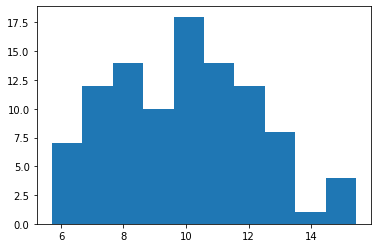

In [35]:
import matplotlib.pyplot as plt
plt.hist(x) #종 모양의 보인다...? 

In [36]:
#np.random.randn(10) #randn: 표준정규분포를 따르는 난수 10개 생성

(array([ 0.,  0.,  3., 21., 21., 34., 15.,  4.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 <a list of 50 Patch objects>)

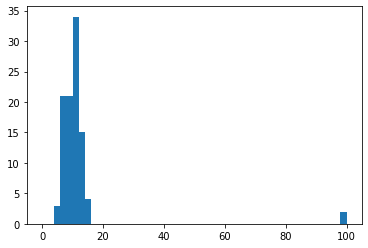

In [44]:
x[98:100]=100
x #outlier를 임의적으로 100을 집어 넣음.
plt.hist(x, bins=np.arange(0,102,2)) #bins: var의 x의 간격 2씩 증가. index는 0부터 101까지.

In [49]:
x.mean() #평균이 이상치의 영향을 크게 받음.
x.std()
x.shape
x=x.reshape(-1,1) #2차원으로 다시 설정.
x.shape

(100, 1)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,
        29., 41., 17.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([-3.00000000e+00, -2.80000000e+00, -2.60000000e+00, -2.40000000e+00,
        -2.20000000e+00, -2.00000000e+00, -1.80000000e+00, -1.60000000e+00,
        -1.40000000e+00, -1.20000000e+00, -1.00000000e+00, -8.00000000e-01,
        -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,  2.66453526e-15,
         2.00000000e-01,  4.00000000e-01,  6.00000000e-01,  8.00000000e-01,
         1.00000000e+00,  1.20000000e+00,  1.40000000e+00,  1.60000000e+00,
         1.80000000e+00,  2.00000000e+00,  2.20000000e+00,  2.40000000e+00,
         2.60000000e+00,  2.80000000e+00]),
 <a list of 29 Patch objects>)

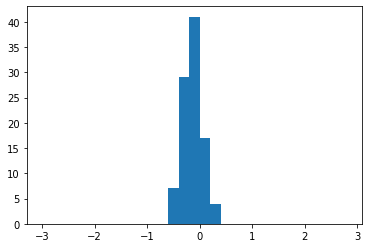

In [60]:
np.mean(StandardScaler().fit_transform(x)) #mean:0
np.std(StandardScaler().fit_transform(x)) #std:1
xs = StandardScaler().fit_transform(x) #맨 밑의 2개값의 주의 0의 가까운 수가 나와야하는데, 그렇지않음.
# plt.hist(xs) #이상치가 보임.
xss=xs[xs<5]
plt.hist(xss,bins=np.arange(-3,3,0.2))

In [66]:
#이상치 -> 중앙값, iqr 표준화
np.median(x) #9.8
q1=np.percentile(x, 25, axis=0) #x 오름차순 정렬을 했을 때, 25% 지점에 있는 데이터를 추출하는 함수 (1사분위수)
q1
q3=np.percentile(x, 75, axis=0)#(3사분위수)
q3
iqr=q3-q1
iqr #3.50

array([3.5014623])

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  7.,  4., 11., 10.,
        6.,  9., 14., 10.,  8.,  7.,  5.,  0.,  3.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.]), array([-3.00000000e+00, -2.80000000e+00, -2.60000000e+00, -2.40000000e+00,
       -2.20000000e+00, -2.00000000e+00, -1.80000000e+00, -1.60000000e+00,
       -1.40000000e+00, -1.20000000e+00, -1.00000000e+00, -8.00000000e-01,
       -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,  2.66453526e-15,
        2.00000000e-01,  4.00000000e-01,  6.00000000e-01,  8.00000000e-01,
        1.00000000e+00,  1.20000000e+00,  1.40000000e+00,  1.60000000e+00,
        1.80000000e+00,  2.00000000e+00,  2.20000000e+00,  2.40000000e+00,
        2.60000000e+00,  2.80000000e+00]), <a list of 29 Patch objects>)


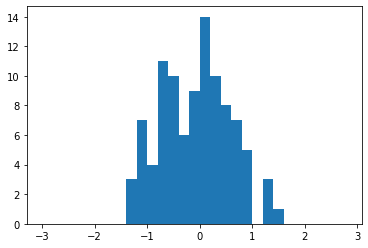

In [75]:
xr=RobustScaler().fit_transform(x)
xr[-10:]
np.median(xr) #0, 중위수가 0이 나옴.
np.mean(xr) #0.43
np.std(xr) #3.6
xrs=xr[xr<5]

#어느 데이터가 더 넓게 퍼져있는가? 비교 =>(결과: RobustScaler를 추천.)
print(plt.hist(xrs, bins=np.arange(-3,3,0.2))) # 더 넓게 퍼져있음. y데이터를 설명하는데 더 용이. (산포가 좋음.)
#print(plt.hist(xss,bins=np.arange(-3,3,0.2))) # x-mean / std (xss 데이터)

In [81]:
# (x-x.min()) / (x.max() - x.min()) #min max scaler
from sklearn.preprocessing import MinMaxScaler

#0~1사이의 수로 변환하는 MInMaxScaler.
MinMaxScaler().fit_transform(x) #(x-x.min()) / (x.max() - x.min())와 같음. 짱편~ 함수 외우기!

array([[0.02937709],
       [0.03021757],
       [0.09433122],
       [0.02104226],
       [0.06540892],
       [0.05889185],
       [0.05500024],
       [0.00512483],
       [0.08466136],
       [0.02804965],
       [0.04199348],
       [0.05601604],
       [0.03588323],
       [0.03286424],
       [0.04841758],
       [0.05068863],
       [0.02015354],
       [0.00761653],
       [0.05816613],
       [0.00885125],
       [0.01437688],
       [0.06339186],
       [0.05590747],
       [0.03756753],
       [0.06216815],
       [0.06414852],
       [0.07916966],
       [0.03879809],
       [0.06002645],
       [0.05536909],
       [0.05323821],
       [0.02002292],
       [0.06582055],
       [0.10325142],
       [0.05571729],
       [0.0120687 ],
       [0.05811111],
       [0.02751336],
       [0.03184269],
       [0.06886525],
       [0.04073166],
       [0.04947022],
       [0.0269786 ],
       [0.02409623],
       [0.05852683],
       [0.02473257],
       [0.04880927],
       [0.046

In [87]:
#연속형 변수를 이항 변수화(0 아니면 1로 나누겠다.)
from sklearn.preprocessing import Binarizer #이항변수화 시키는 클래스
x=np.array([[10,-10,1],[5,0,3],[0,7,5]])
x #0보다 크면 1, 작거나 같으면 0 : 이항변수화
bi=Binarizer().fit(x) #Binarzier 객체 생성, threshold ((인계값=기준값을 의미), 기준값이 0으로 설정되어있음.)
bi.transform(x)

array([[1, 0, 1],
       [1, 0, 1],
       [0, 1, 1]])

In [92]:
bi=Binarizer(threshold=4).fit(x) #4를 기준으로 이항변수화
bi.transform(x)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 1]])

#원핫(1)인코더: 범주형 변수 -> 이항변수화 (엄청많이쓰임!!!)

#순서가 없는 범주형.
#범주형 변수를 이항변수화 설명
범주형 변수는 원핫인코딩(이항변수화) 되어있어야 함!
why? 모델을 만들 수 없기 때문에

#예시

(성별)
남 0 -> 1 0
여 1 -> 0 1

(연령대) 4개의 종류이므로 4자리로 변환
20대 1000
30대 0100
40대 0010
10대 0001

In [93]:
from sklearn.preprocessing import OneHotEncoder

In [98]:
#[성별(0~1), 연령대(0~2), 등급(0~4)]
data = np.array([[0,0,0], #101001000 총 9자리 남자 20대 1등급
                [0,1,1], 
                [0,2,2],
                [1,0,3],
                [1,1,4]])

# OneHotEncoder().fit(data) #변수이름이 없음.
ohe=OneHotEncoder() #일반적으로 변수 사용함. 
ohe.fit(data)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [103]:
import pandas as pd

In [106]:
df=pd.DataFrame({
    'c1':np.random.randn(10),
    'c2':['a','a','a','a','a','b','b','b','b','b']
})
df

,c1,c2
0,-1.313953,a
1,-1.411953,a
2,-0.309123,a
3,-0.393349,a
4,0.101324,a
5,0.922285,b
6,-2.031031,b
7,-0.424519,b
8,1.159881,b
9,1.875916,b


In [119]:
bins=np.linspace(df.c1.min(),df.c1.max(),5) #linspace: c1컬럼값을 기준으로 균등하게 5개로 영역을 나눔
bins

df['c1bin']=np.digitize(df['c1'], bins) #digitize: 영역으로 나눈것을 수치로 바꾼것.1영역=min~5영역=max
df

print(df['c1bin'])
print("-"*50)
print(pd.get_dummies(df['c1bin'], prefix='c1')) #dummies: 원샷인코딩해주는 함수

0    1
1    1
2    2
3    2
4    3
5    4
6    1
7    2
8    4
9    5
Name: c1bin, dtype: int64
--------------------------------------------------
   c1_1  c1_2  c1_3  c1_4  c1_5
0     1     0     0     0     0
1     1     0     0     0     0
2     0     1     0     0     0
3     0     1     0     0     0
4     0     0     1     0     0
5     0     0     0     1     0
6     1     0     0     0     0
7     0     1     0     0     0
8     0     0     0     1     0
9     0     0     0     0     1


In [120]:
df.c1.min()
df.c1.max()

1.8759156248515392

In [126]:
from sklearn.preprocessing import LabelEncoder

In [127]:
#원핫인코더: 딸기 -> 100, 사과 -> 010, 바나나 -> 001
#레이블인코더: 딸기 -> 1, 사과 -> 2, 바나나 -> 3

# le=LabelEncoder()
# df['column']=le.fit_transform(df['column'])

In [134]:
train=pd.read_csv("../data/train.csv")
test=pd.read_csv("../data/test.csv")
train.shape #891, 12
test.shape #418, 11

(418, 11)

In [137]:
train.dtypes
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [146]:
train.columns
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [145]:
train.describe()
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [148]:
objDf=train.select_dtypes(include=['object']).copy() #타입이 objiect인 것만 데이터 프레임을 생성.
objDf

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [152]:
objDf.isnull()

,Name,Sex,Ticket,Cabin,Embarked
0,False,False,False,True,False
1,False,False,False,False,False
2,False,False,False,True,False
3,False,False,False,False,False
4,False,False,False,True,False
...,...,...,...,...,...
886,False,False,False,True,False
887,False,False,False,False,False
888,False,False,False,True,False
889,False,False,False,False,False


In [155]:
#any함수는 어느 하나라도 True -> True
any([False,False,False]) #False
any([False,True,False]) #True

#all함수는 모두 True -> True

True

In [161]:
objDf.isnull().any(axis=0) #columns 단위로
objDf.isnull().any(axis=1) #rows 단위로

#objDf[True, True, Fasle...] True인 값만 참조되어 출력된다. 
objDf[objDf.isnull().any(axis=1)] #rows 단위로 null 한개라도 있으면 출력.
objDf[objDf.isnull().any(axis=1)].shape #689,5 결측값이 많구나 생각해야함.

(689, 5)

In [164]:
objDf['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
D              3
              ..
D11            1
B39            1
A34            1
D37            1
C90            1
Name: Cabin, Length: 147, dtype: int64

In [172]:
train['Sex'].value_counts()
train['Sex']
train[train['Sex']=='male']['Sex']=0 #['Sex']칼럼을 참조

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
